In [218]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [219]:
data_0 = pd.read_csv(r'D:\PycharmProjects\260276\zpi\data\maestro-calculated.csv', low_memory=False)
data_0

,hac-run-id,parent_uid,uid,batch-workflow,rd-run-id,kafka_offset,bsinp-run-id,source-type-is-ib,skip-mdl-landing,as-of-datetime,...,source-type-is-pb,failed-job-status,business-date,regulatory-approaches,processing-location-is-ch,as-of-date,rules-branch,process-flag,total-time,processing-location-is-eur
0,NaN,1be997ff0fa411ed9efe4be67384bf3f,1bf0c3f00fa411ed9efe75307937e094,STRATEGIC_PAC,NaN,546090,NaN,NaN,NaN,2022-07-30_03.08.13,...,NaN,NaN,2022-07-29,NaN,NaN,2022-07-29,NaN,NaN,1,NaN
1,1.0,1bf0c3f00fa411ed9efe75307937e094,1d276f310fa411ed9efe8981c11f5895,STRATEGIC_PAC,NaN,546096,NaN,NaN,NaN,2022-07-30_03.08.13,...,NaN,NaN,2022-07-29,NaN,NaN,2022-07-29,NaN,NaN,2,NaN
2,1.0,1d276f310fa411ed9efe8981c11f5895,1efd67b20fa411ed9efe9dbf45703841,STRATEGIC_PAC,NaN,546102,129.0,NaN,NaN,2022-07-29_00.00.00,...,NaN,NaN,2022-07-29,NaN,NaN,2022-07-29,NaN,NaN,1,NaN
3,1.0,1efd67b20fa411ed9efe9dbf45703841,20d312130fa411ed9efe07e63de37124,STRATEGIC_PAC,NaN,546111,129.0,1.0,NaN,2022-07-29_00.00.00,...,NaN,NaN,2022-07-29,NaN,NaN,2022-07-29,NaN,NaN,40,NaN
4,1.0,20d312130fa411ed9efe07e63de37124,39169e550fa411ed9efe498d27132ecc,STRATEGIC_PAC,NaN,546117,129.0,1.0,NaN,2022-07-29_00.00.00,...,NaN,NaN,2022-07-29,NaN,NaN,2022-07-29,NaN,NaN,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31133,1.0,2fd422d7e34a11edaf6b6bd0bed048f9,524163e1e34c11edaf6b1364def34e2f,STRATEGIC_EUR,1.0,397271,0.0,1.0,NaN,2023-04-24_00.00.00,...,NaN,NaN,2023-04-24,NaN,NaN,2023-04-24,NaN,NaN,411,1.0
31134,1.0,52413cd0e34c11edaf6b0908036732d3,58eeae05e34c11edaf6bcf4ed6ab053b,STRATEGIC_EUR,1.0,397245,0.0,1.0,NaN,2023-04-24_00.00.00,...,NaN,NaN,2023-04-24,NaN,NaN,2023-04-24,NaN,NaN,264,1.0
31135,1.0,52413cd0e34c11edaf6b0908036732d3,58eed516e34c11edaf6b133d69ebf13d,STRATEGIC_EUR,1.0,397282,0.0,1.0,NaN,2023-04-24_00.00.00,...,NaN,NaN,2023-04-24,NaN,NaN,2023-04-24,NaN,NaN,520,1.0
31136,1.0,524163e1e34c11edaf6b1364def34e2f,47712ea5e34d11edaf6b912fe9b3fc66,STRATEGIC_EUR,1.0,397295,0.0,1.0,NaN,2023-04-24_00.00.00,...,NaN,NaN,2023-04-24,NaN,NaN,2023-04-24,NaN,NaN,191,1.0


In [220]:
data_core = data_0[["processing-time","total-time","waiting-time","business-day","skip-mdl-landing","skip-mdl-out","batch-workflow",'parent_uid',"uid","job_name","source-type-is-ib","source-type-is-pb","batch-instance-seq"]].copy()
data_core

,processing-time,total-time,waiting-time,business-day,skip-mdl-landing,skip-mdl-out,batch-workflow,parent_uid,uid,job_name,source-type-is-ib,source-type-is-pb,batch-instance-seq
0,1,1,0,BD0,NaN,NaN,STRATEGIC_PAC,1be997ff0fa411ed9efe4be67384bf3f,1bf0c3f00fa411ed9efe75307937e094,open-date-card,NaN,NaN,NaN
1,1,2,1,BD0,NaN,NaN,STRATEGIC_PAC,1bf0c3f00fa411ed9efe75307937e094,1d276f310fa411ed9efe8981c11f5895,init-strategic-batch,NaN,NaN,NaN
2,0,1,1,BD0,NaN,NaN,STRATEGIC_PAC,1d276f310fa411ed9efe8981c11f5895,1efd67b20fa411ed9efe9dbf45703841,start-strategic-batch,NaN,NaN,1.0
3,39,40,1,BD0,NaN,NaN,STRATEGIC_PAC,1efd67b20fa411ed9efe9dbf45703841,20d312130fa411ed9efe07e63de37124,land-f1ref-data,1.0,NaN,1.0
4,52,52,0,BD0,NaN,NaN,STRATEGIC_PAC,20d312130fa411ed9efe07e63de37124,39169e550fa411ed9efe498d27132ecc,reload-f1ref-landing-tables,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31133,411,411,0,BD0,NaN,NaN,STRATEGIC_EUR,2fd422d7e34a11edaf6b6bd0bed048f9,524163e1e34c11edaf6b1364def34e2f,run-b3lech-calculation,1.0,NaN,1.0
31134,263,264,1,BD0,NaN,NaN,STRATEGIC_EUR,52413cd0e34c11edaf6b0908036732d3,58eeae05e34c11edaf6bcf4ed6ab053b,reload-b3-tables,1.0,NaN,1.0
31135,519,520,1,BD0,NaN,NaN,STRATEGIC_EUR,52413cd0e34c11edaf6b0908036732d3,58eed516e34c11edaf6b133d69ebf13d,mdl-out-b3,1.0,NaN,1.0
31136,191,191,0,BD0,NaN,NaN,STRATEGIC_EUR,524163e1e34c11edaf6b1364def34e2f,47712ea5e34d11edaf6b912fe9b3fc66,reload-b3lech-tables,1.0,NaN,1.0


In [221]:
#data_core["business-day"] = data_core["business-day"].str.slice(2,3).replace(np.nan, -1)
one_hot = pd.get_dummies(data_core[['business-day','batch-workflow','skip-mdl-landing','skip-mdl-out']])
data_core = pd.concat([data_core, one_hot], axis=1)
#data_core["skip-mdl-landing"] = data_core["skip-mdl-landing"].replace([np.nan, False], [0, 1])
#data_core["skip-mdl-out"] = data_core["skip-mdl-out"].replace([np.nan, True], [0, 1])
data_core = data_core.drop(['business-day','batch-workflow','skip-mdl-landing','skip-mdl-out'],axis=1)
data_parent = data_core[["uid","processing-time","total-time","waiting-time",]].copy().rename(columns={"processing-time":"parent-processing-time",                                                                                                                            "total-time":"parent-total-time",
                                                                                                       "waiting-time":"parent-waiting-time"})


In [222]:
result = pd.merge(data_core, data_parent, left_on="parent_uid", right_on="uid", how="left")
result[["parent-processing-time", "parent-total-time", "parent-waiting-time","source-type-is-ib","source-type-is-pb","batch-instance-seq"]] = result[["parent-processing-time", "parent-total-time", "parent-waiting-time","source-type-is-ib","source-type-is-pb","batch-instance-seq"]].replace(np.nan, 0)

In [223]:
print(result.shape[1])
result

31


,processing-time,total-time,waiting-time,parent_uid,uid_x,job_name,source-type-is-ib,source-type-is-pb,batch-instance-seq,business-day_BD0,...,batch-workflow_STRATEGIC_EUR,batch-workflow_STRATEGIC_PAC,batch-workflow_STRATEGIC_SEC,skip-mdl-landing_False,skip-mdl-landing_True,skip-mdl-out_True,uid_y,parent-processing-time,parent-total-time,parent-waiting-time
0,1,1,0,1be997ff0fa411ed9efe4be67384bf3f,1bf0c3f00fa411ed9efe75307937e094,open-date-card,0.0,0.0,0.0,1,...,0,1,0,0,0,0,NaN,0.0,0.0,0.0
1,1,2,1,1bf0c3f00fa411ed9efe75307937e094,1d276f310fa411ed9efe8981c11f5895,init-strategic-batch,0.0,0.0,0.0,1,...,0,1,0,0,0,0,1bf0c3f00fa411ed9efe75307937e094,1.0,1.0,0.0
2,0,1,1,1d276f310fa411ed9efe8981c11f5895,1efd67b20fa411ed9efe9dbf45703841,start-strategic-batch,0.0,0.0,1.0,1,...,0,1,0,0,0,0,1d276f310fa411ed9efe8981c11f5895,1.0,2.0,1.0
3,39,40,1,1efd67b20fa411ed9efe9dbf45703841,20d312130fa411ed9efe07e63de37124,land-f1ref-data,1.0,0.0,1.0,1,...,0,1,0,0,0,0,1efd67b20fa411ed9efe9dbf45703841,0.0,1.0,1.0
4,52,52,0,20d312130fa411ed9efe07e63de37124,39169e550fa411ed9efe498d27132ecc,reload-f1ref-landing-tables,1.0,0.0,1.0,1,...,0,1,0,0,0,0,20d312130fa411ed9efe07e63de37124,39.0,40.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31137,411,411,0,2fd422d7e34a11edaf6b6bd0bed048f9,524163e1e34c11edaf6b1364def34e2f,run-b3lech-calculation,1.0,0.0,1.0,1,...,1,0,0,0,0,0,2fd422d7e34a11edaf6b6bd0bed048f9,916.0,917.0,1.0
31138,263,264,1,52413cd0e34c11edaf6b0908036732d3,58eeae05e34c11edaf6bcf4ed6ab053b,reload-b3-tables,1.0,0.0,1.0,1,...,1,0,0,0,0,0,52413cd0e34c11edaf6b0908036732d3,0.0,0.0,0.0
31139,519,520,1,52413cd0e34c11edaf6b0908036732d3,58eed516e34c11edaf6b133d69ebf13d,mdl-out-b3,1.0,0.0,1.0,1,...,1,0,0,0,0,0,52413cd0e34c11edaf6b0908036732d3,0.0,0.0,0.0
31140,191,191,0,524163e1e34c11edaf6b1364def34e2f,47712ea5e34d11edaf6b912fe9b3fc66,reload-b3lech-tables,1.0,0.0,1.0,1,...,1,0,0,0,0,0,524163e1e34c11edaf6b1364def34e2f,411.0,411.0,0.0


In [224]:
print(result.columns)
print(result.dtypes)

Index(['processing-time', 'total-time', 'waiting-time', 'parent_uid', 'uid_x',
       'job_name', 'source-type-is-ib', 'source-type-is-pb',
       'batch-instance-seq', 'business-day_BD0', 'business-day_BD1',
       'business-day_BD2', 'business-day_BD3', 'business-day_BD4',
       'business-day_BD5', 'business-day_BD6', 'business-day_BD7',
       'business-day_BD8', 'business-day_BD9', 'batch-workflow_STRATEGIC_AMS',
       'batch-workflow_STRATEGIC_CH', 'batch-workflow_STRATEGIC_EUR',
       'batch-workflow_STRATEGIC_PAC', 'batch-workflow_STRATEGIC_SEC',
       'skip-mdl-landing_False', 'skip-mdl-landing_True', 'skip-mdl-out_True',
       'uid_y', 'parent-processing-time', 'parent-total-time',
       'parent-waiting-time'],
      dtype='object')
processing-time                   int64
total-time                        int64
waiting-time                      int64
parent_uid                       object
uid_x                            object
job_name                         object
so

In [225]:
class NeuralNetwork(nn.Module):
    def __init__(self,a):
       super(NeuralNetwork, self).__init__()
       self.linear_relu_stack = nn.Sequential(
           nn.Linear(a, 30),
           nn.ReLU(),
           nn.Linear(30, 60),
           nn.ReLU(),
           nn.Linear(60, 1),
       )
    def forward(self, x):
       x = self.linear_relu_stack(x)
       return x

In [226]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
clf = NeuralNetwork(a=25).to(device)
opt = torch.optim.Adam(clf.parameters(), lr=0.0001)
loss_fn = nn.MSELoss(reduction='sum')
print(device)

cpu


In [227]:
unique_values = result["job_name"].unique()
data_stats = {}
for values in unique_values:
    data_stats[values] = []
    with open(f'D:\\PycharmProjects\\260276\\zpi\\model\\{values}', 'wb') as f:
        torch.save(clf.state_dict(), f)
print(len(unique_values))

66


In [228]:
lenght = result.shape[0]
for i in range(20):
    print(f"epoka:{i}")
    print("[",end ="")
    for index, row in result.iterrows():
        if index % int(lenght // 10) == 0:
            print("=", end ="")
        with open(f'D:\\PycharmProjects\\260276\\zpi\\model\\{row["job_name"]}', 'rb') as f:
            clf.load_state_dict(torch.load(f))
        X = torch.tensor(np.array(row[['processing-time',
                                       'waiting-time',
                                       'business-day_BD0',
                                       'business-day_BD1',
                                       'business-day_BD2',
                                       'business-day_BD3',
                                       'business-day_BD4',
                                       'business-day_BD5',
                                       'business-day_BD6',
                                       'business-day_BD7',
                                       'business-day_BD8',
                                       'business-day_BD9',
                                       'batch-workflow_STRATEGIC_AMS',
                                       'batch-workflow_STRATEGIC_CH',
                                       'batch-workflow_STRATEGIC_EUR',
                                       'batch-workflow_STRATEGIC_PAC',
                                       'batch-workflow_STRATEGIC_SEC',
                                       'skip-mdl-landing_False',
                                       'skip-mdl-out_True',
                                       'parent-processing-time',
                                       'parent-total-time',
                                       'parent-waiting-time',
                                       'source-type-is-ib',
                                       'source-type-is-pb',
                                       'batch-instance-seq',
                                       ]].astype(int))).float()
        Y =torch.tensor([float(row['total-time'])])
        ywhat = clf(X)
        loss = loss_fn(ywhat, Y)
        #print("(predykcja, orginał): ",ywhat.item(), Y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        data_stats[row["job_name"]].append(loss.item()/ywhat.item())
        with open(f'D:\\PycharmProjects\\260276\\zpi\\model\\{row["job_name"]}', 'wb') as f:
            torch.save(clf.state_dict(), f)
    print("]")
print("DONE")
        #print(index, row['job_name'],row['business-day_BD0'])

epoka:0
[===========]
epoka:1
[===========]
epoka:2
[===========]
epoka:3
[===========]
epoka:4
[===========]
epoka:5
[===========]
epoka:6
[===========]
epoka:7
[===========]
epoka:8
[===========]
epoka:9
[===========]
epoka:10
[===========]
epoka:11
[===========]
epoka:12
[===========]
epoka:13
[===========]
epoka:14
[===========]
epoka:15
[===========]
epoka:16
[===========]
epoka:17
[===========]
epoka:18
[===========]
epoka:19
[===========]
DONE


In [229]:
from matplotlib import pyplot as plt

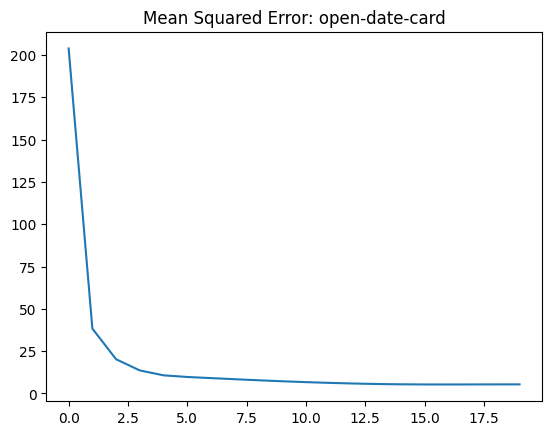

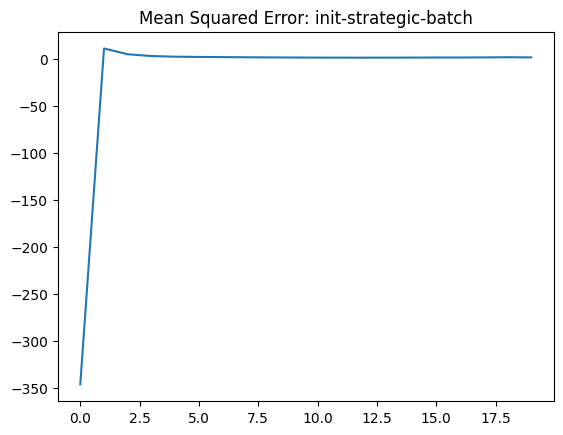

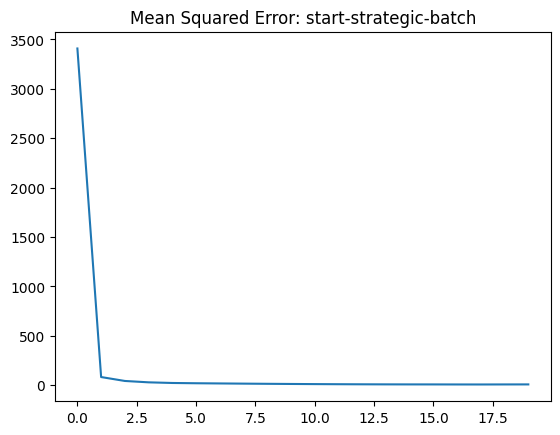

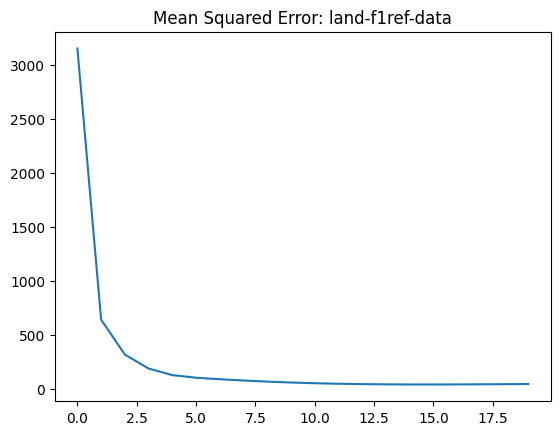

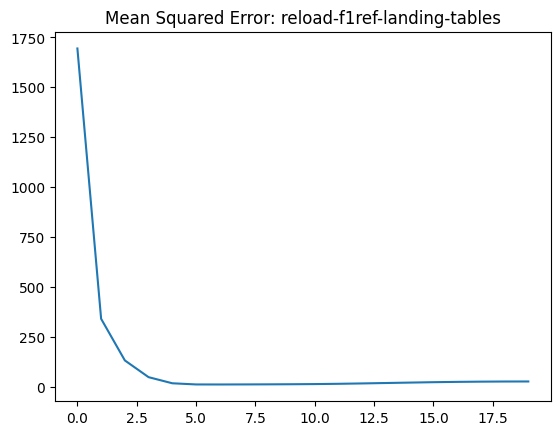

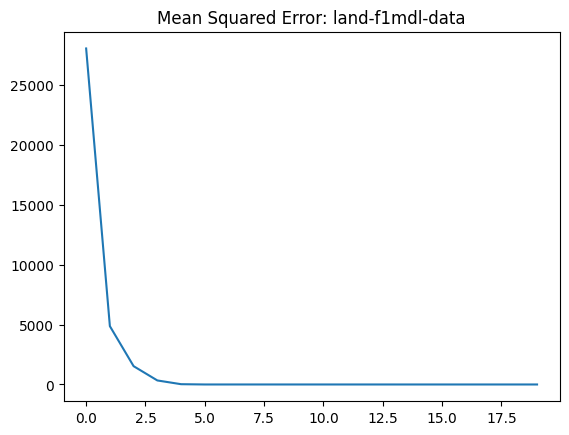

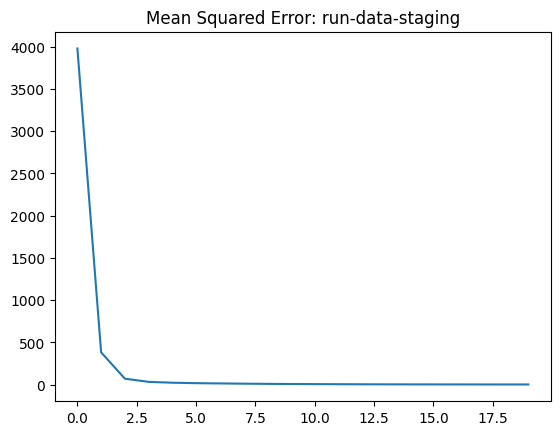

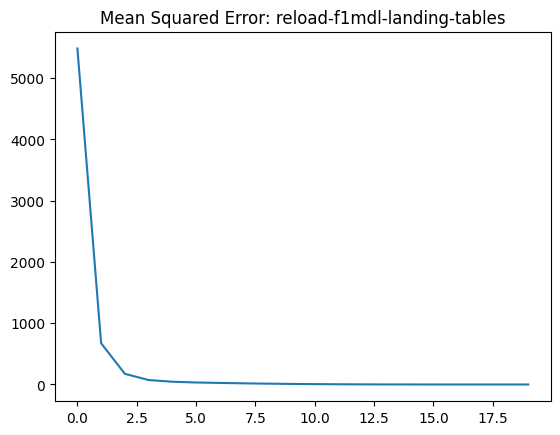

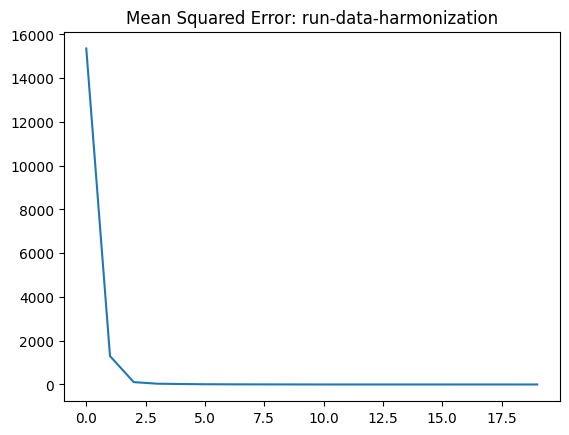

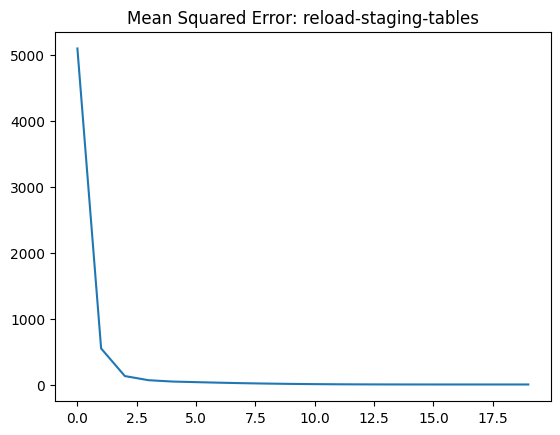

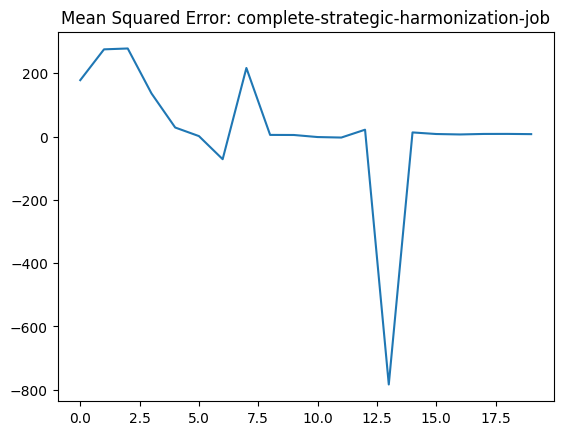

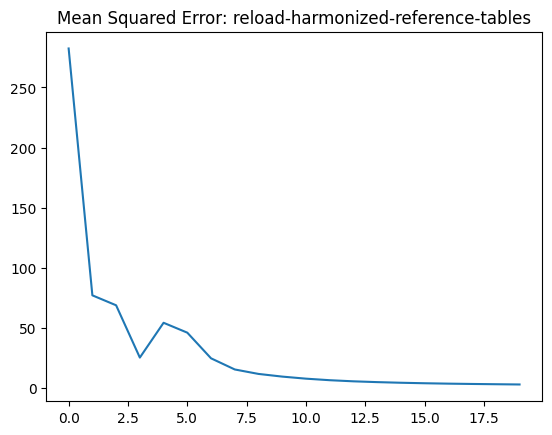

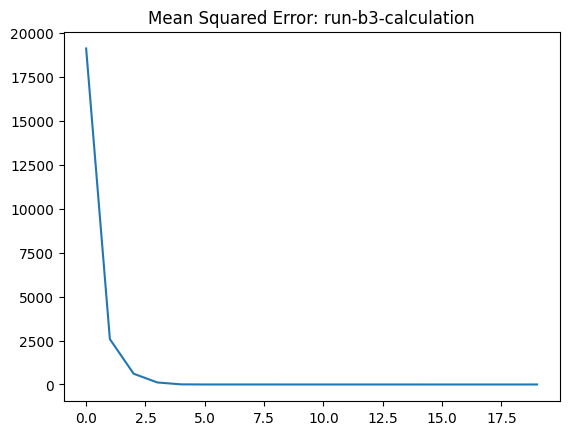

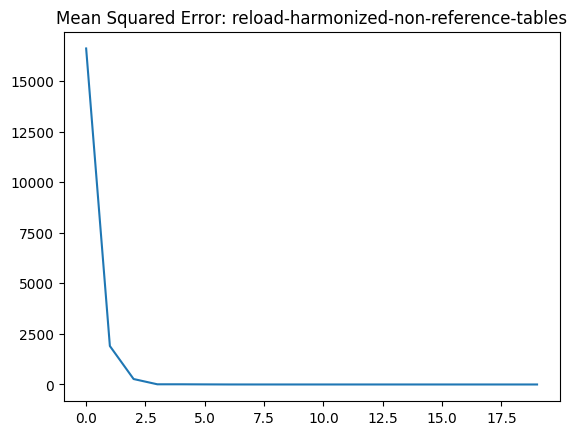

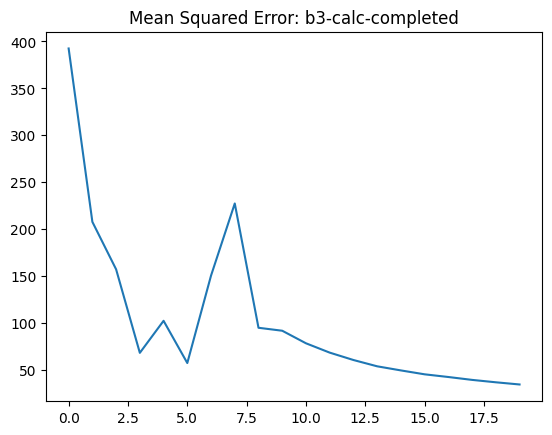

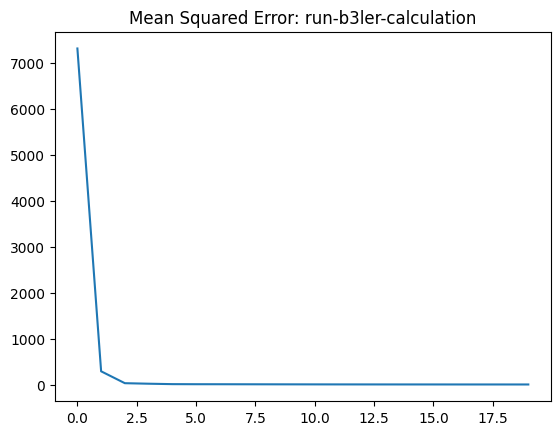

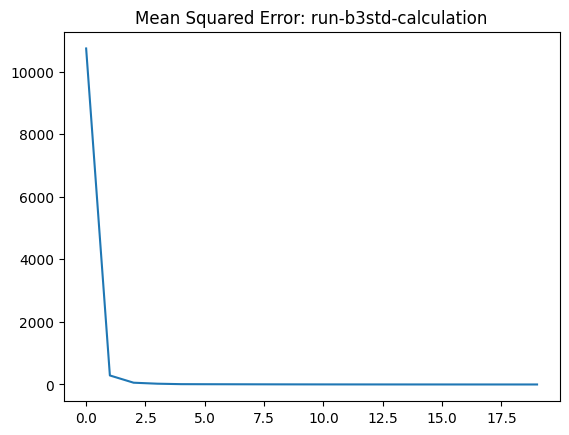

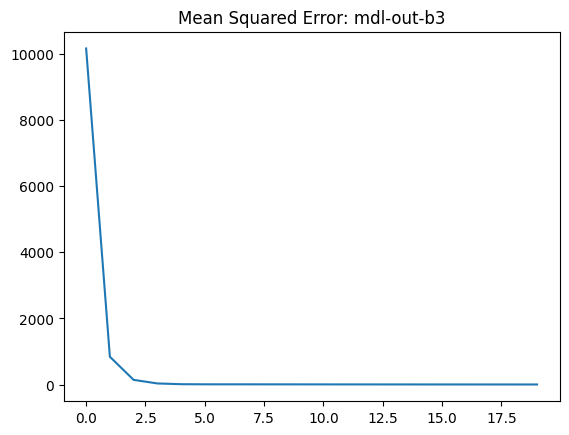

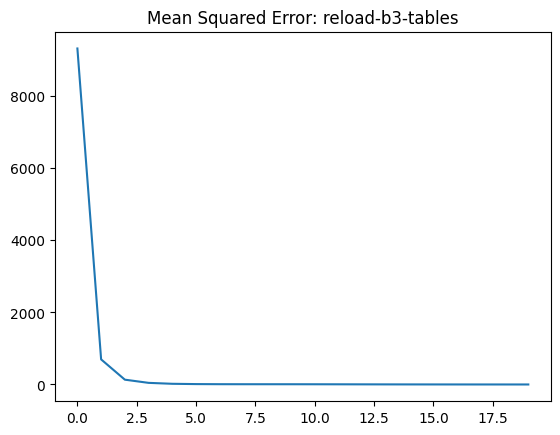

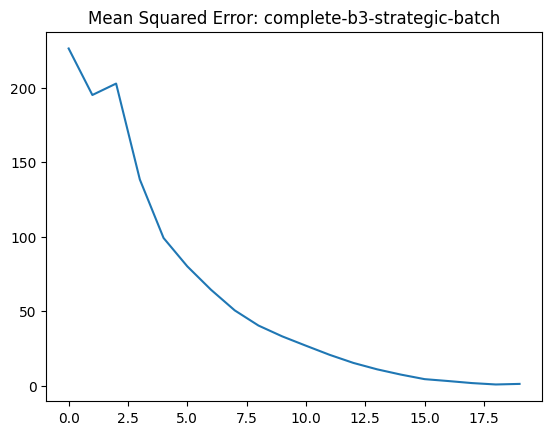

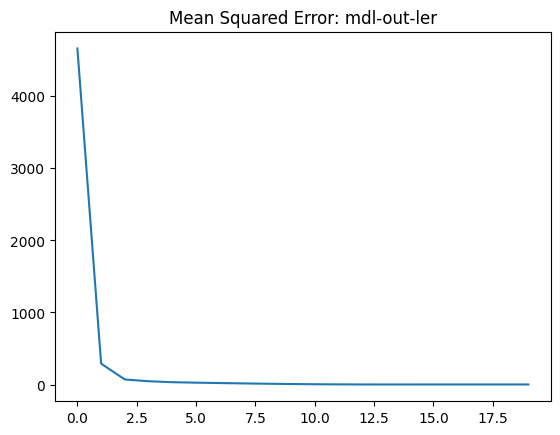

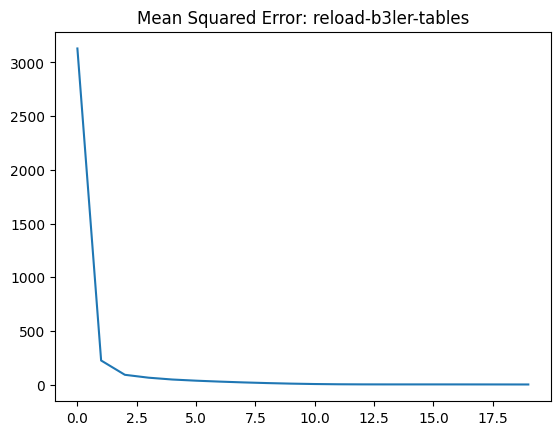

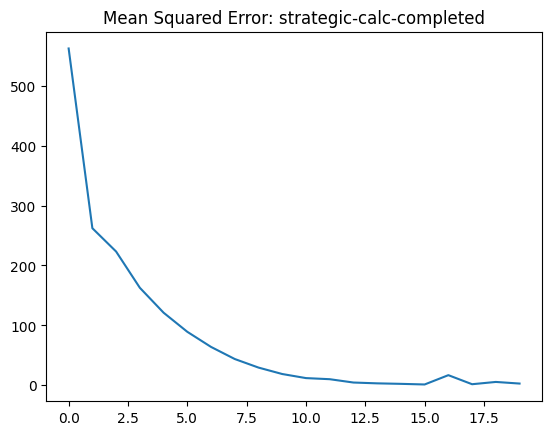

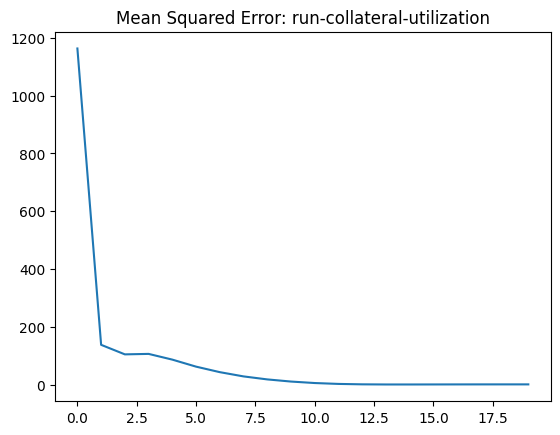

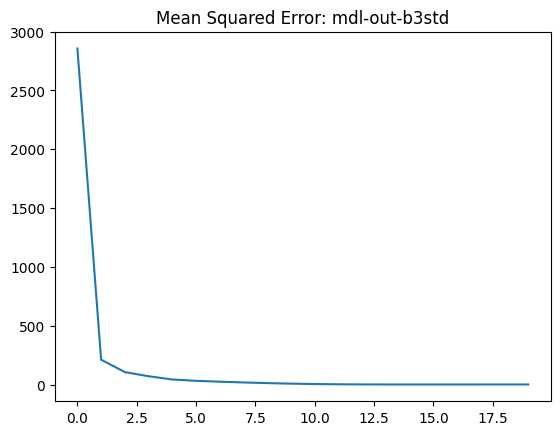

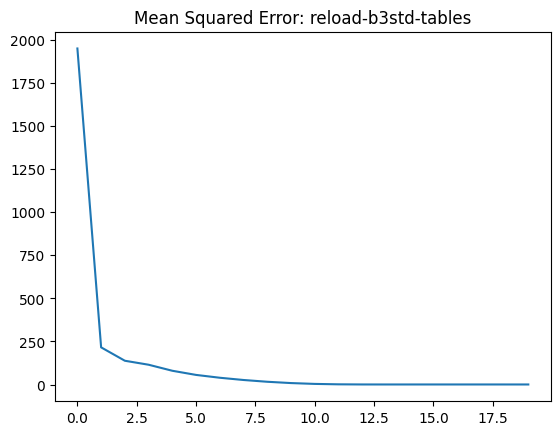

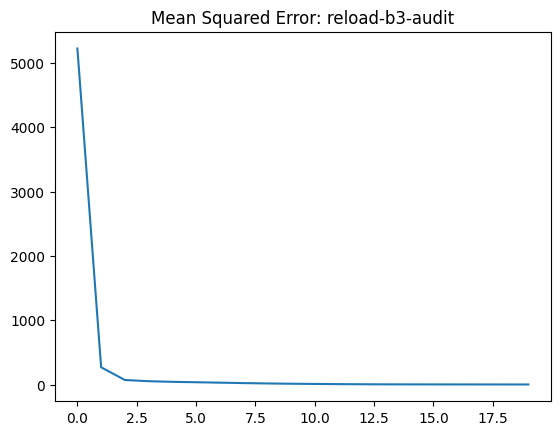

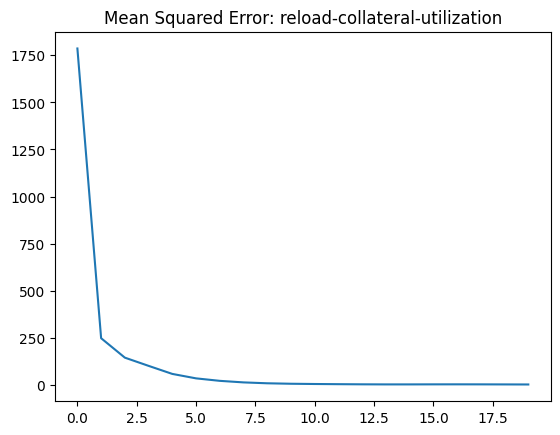

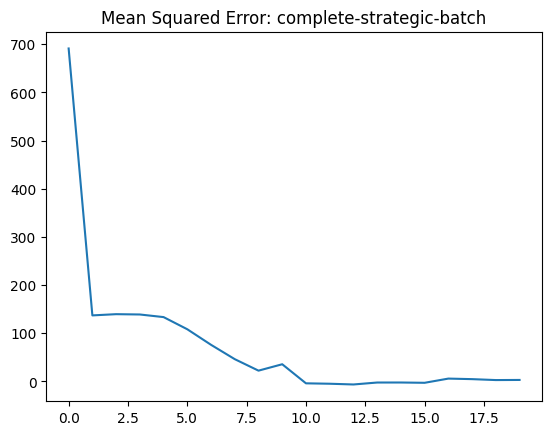

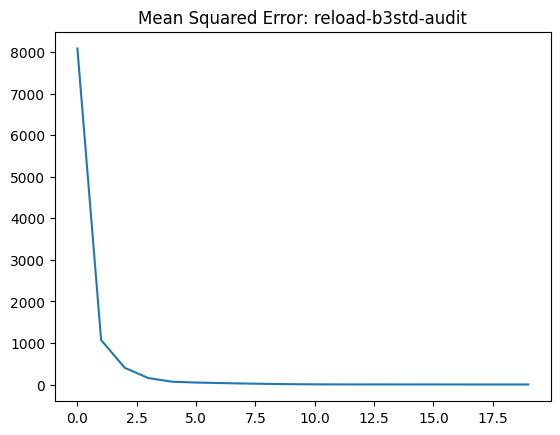

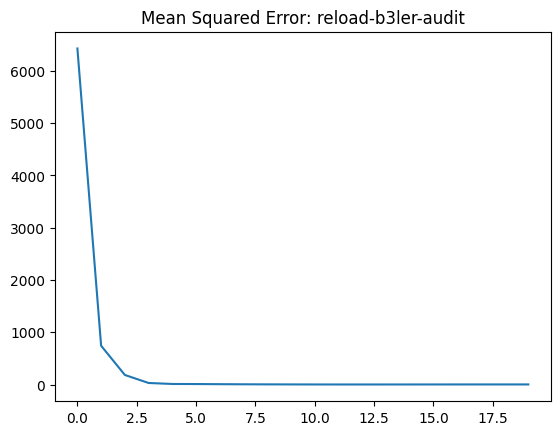

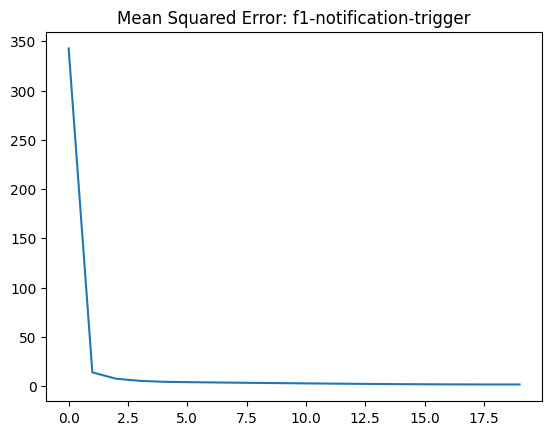

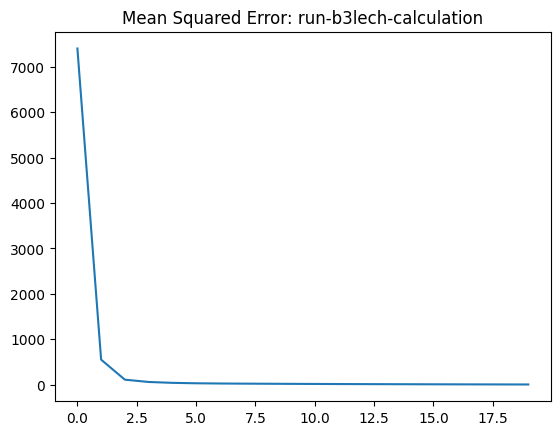

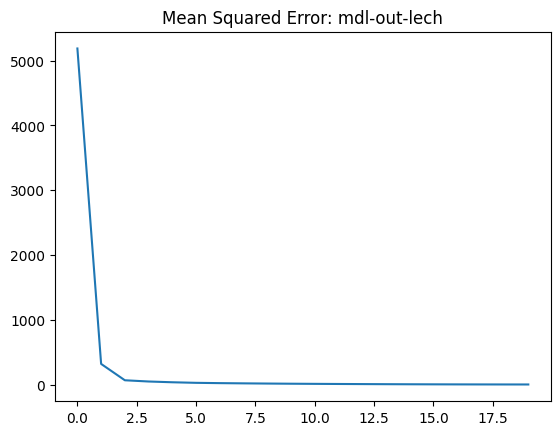

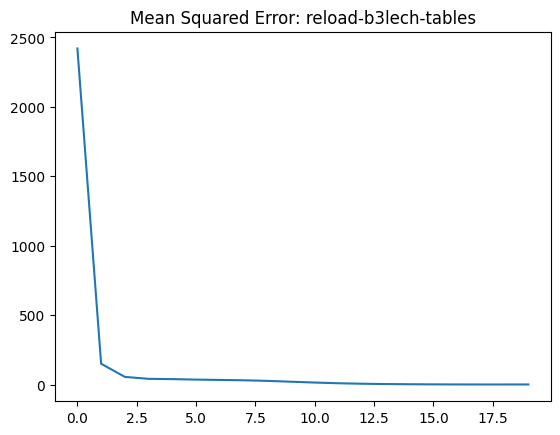

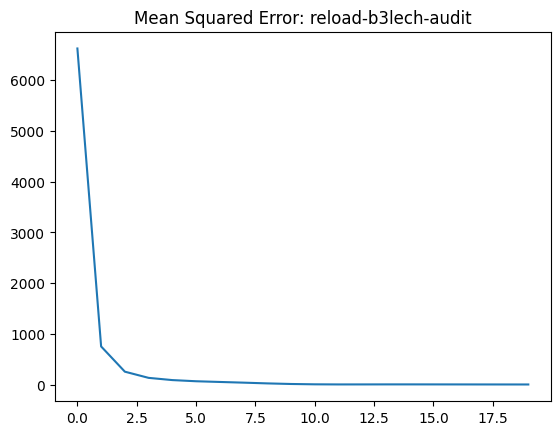

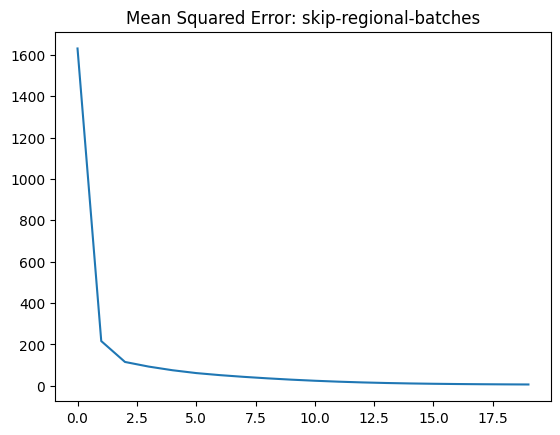

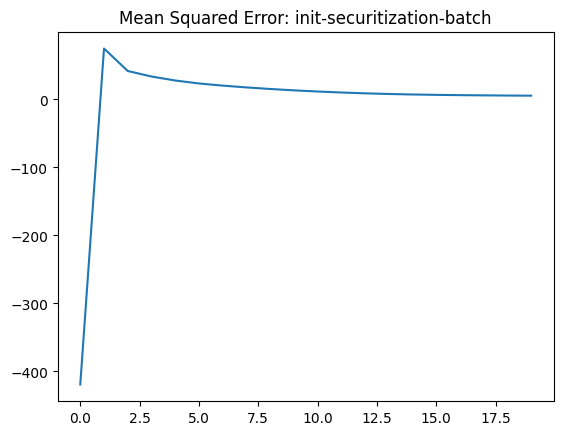

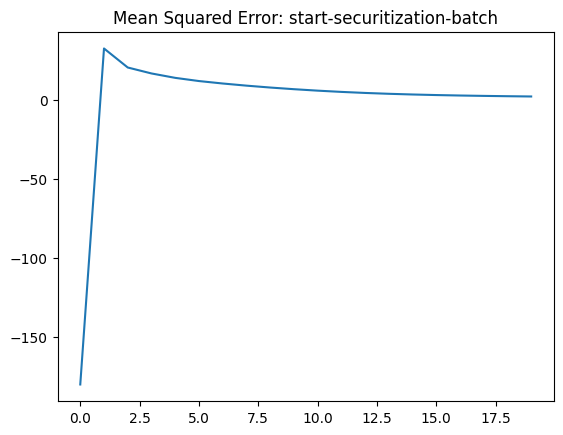

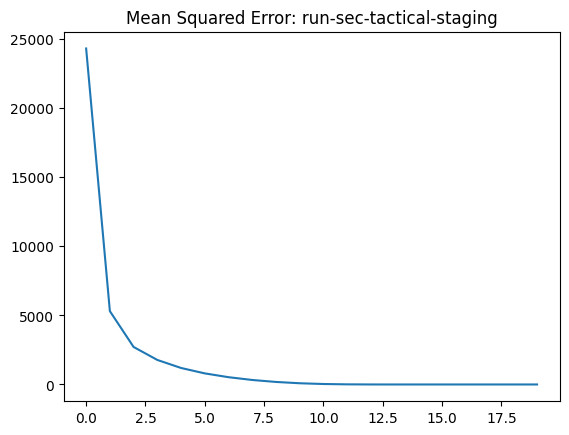

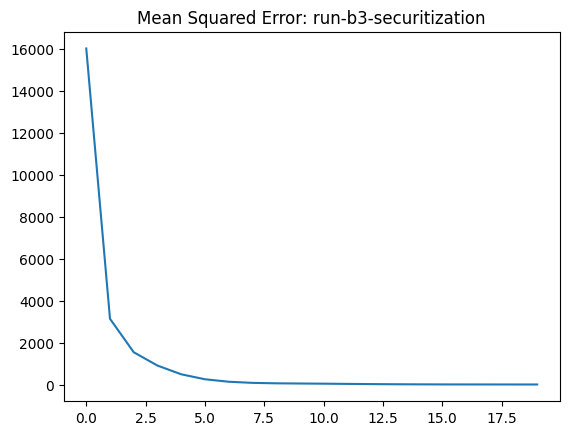

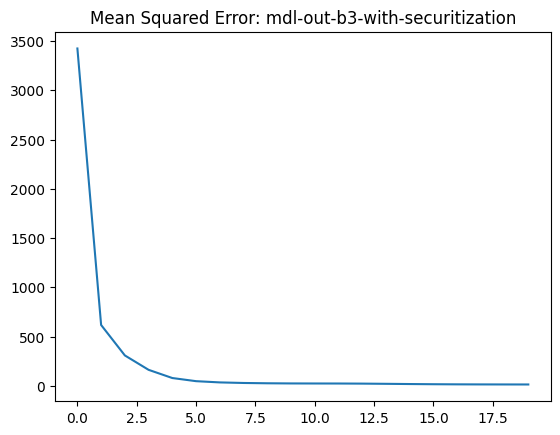

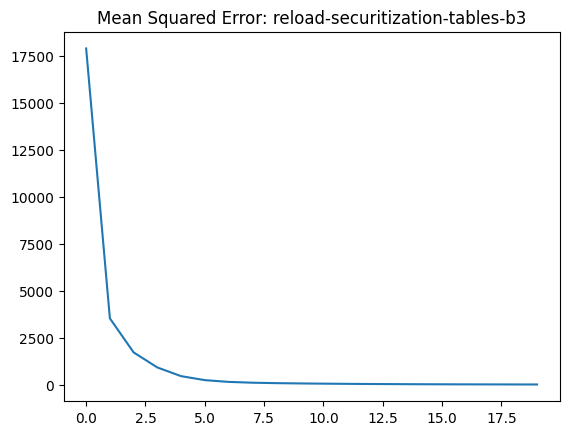

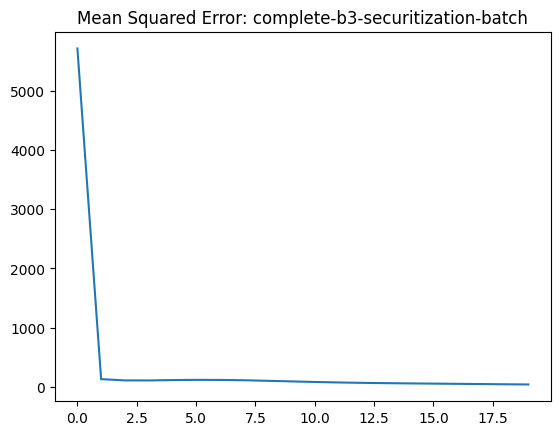

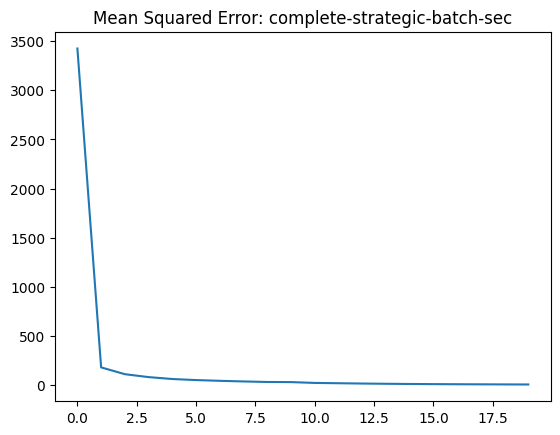

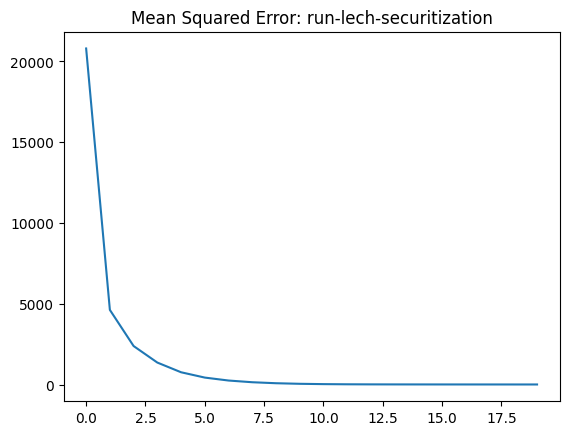

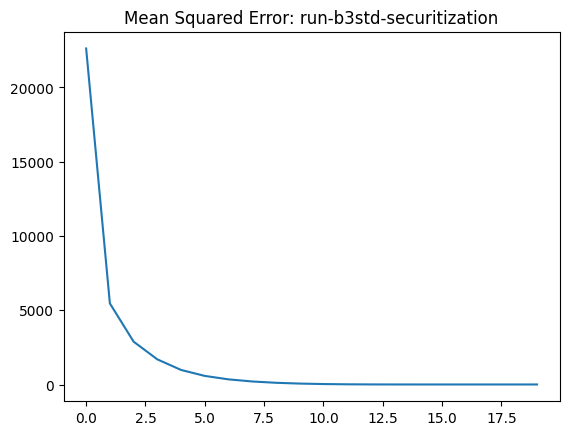

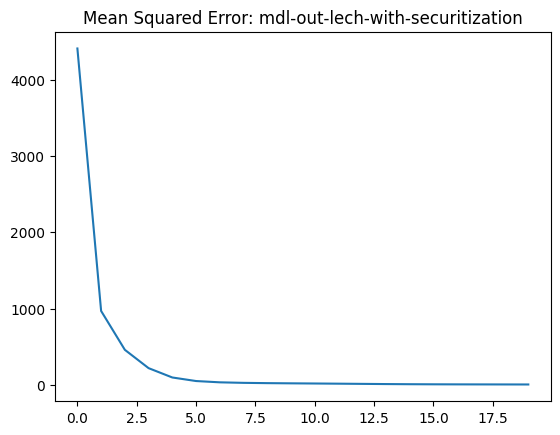

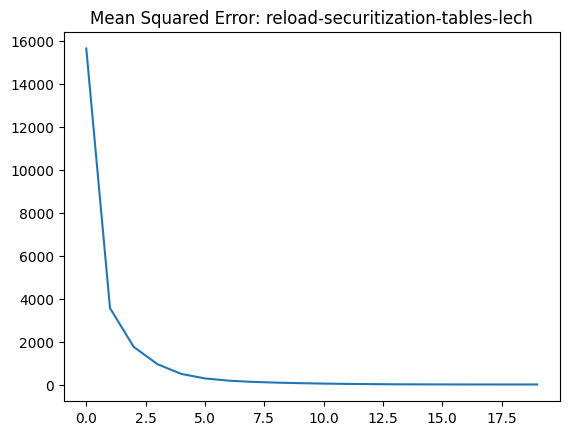

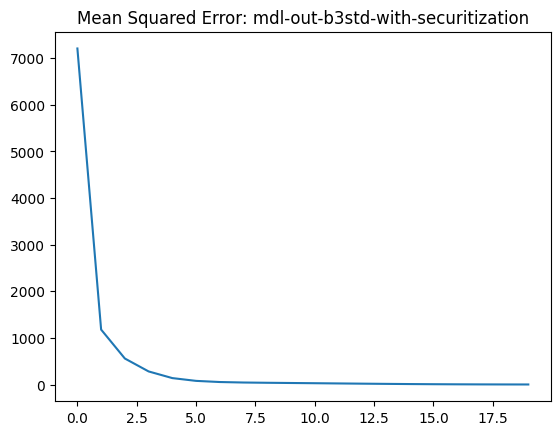

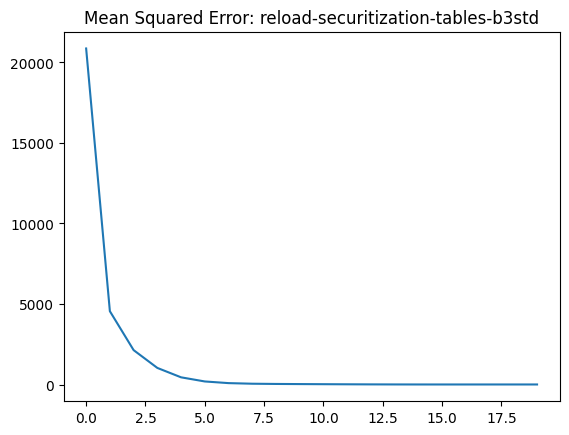

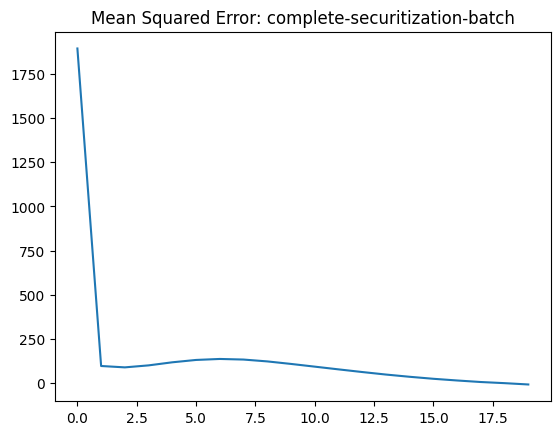

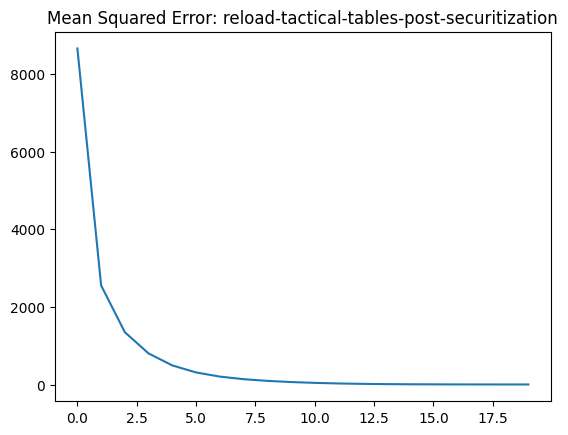

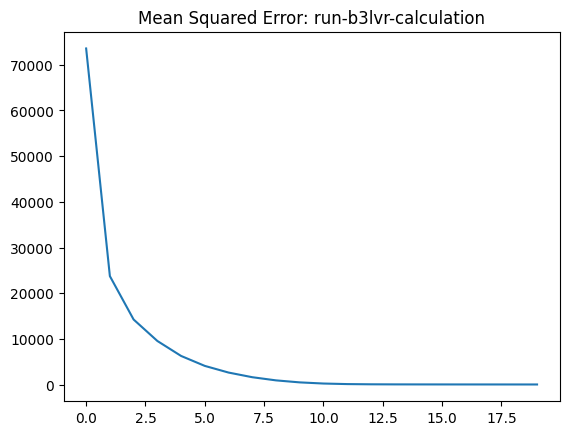

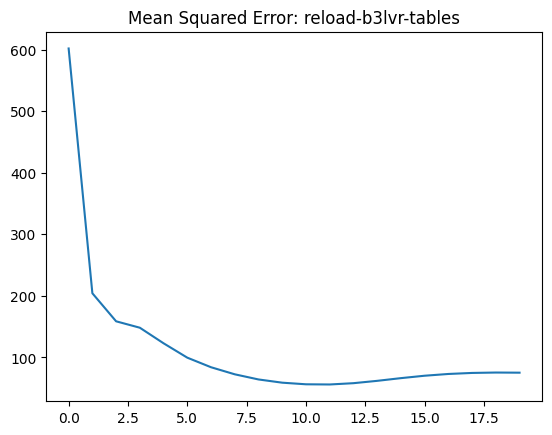

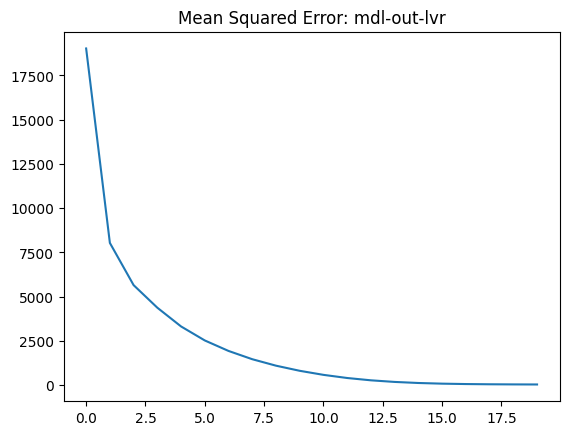

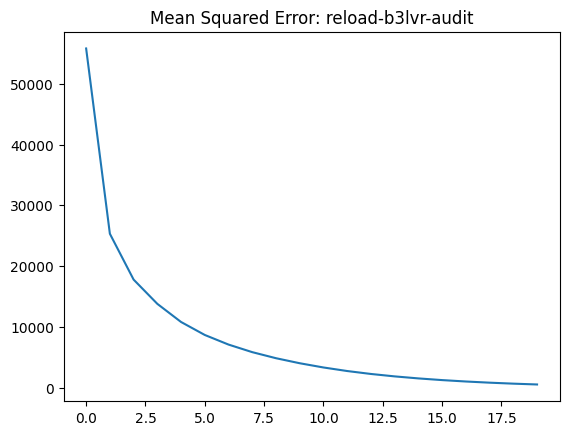

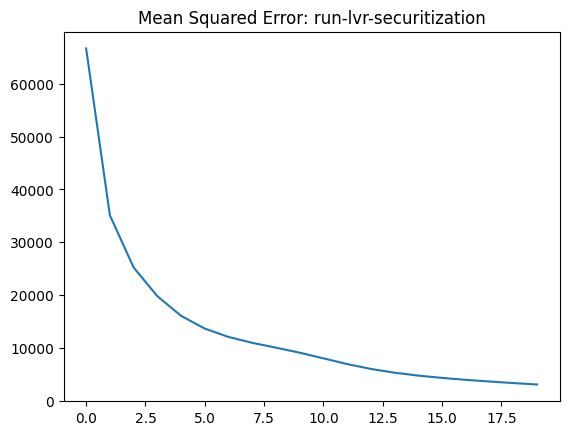

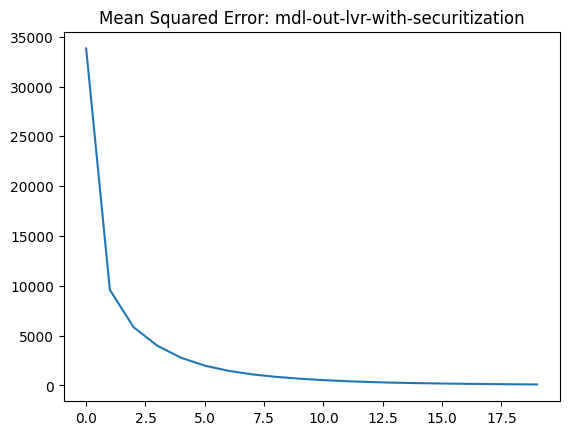

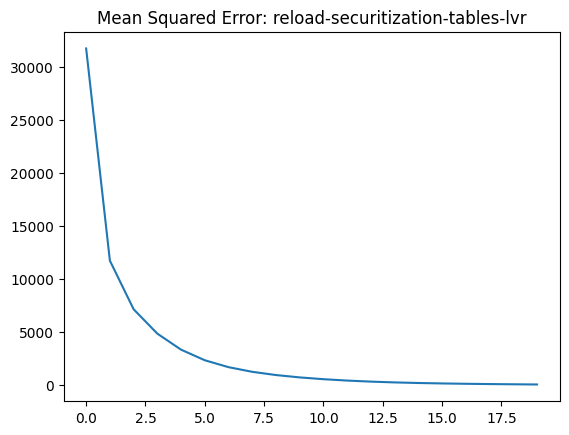

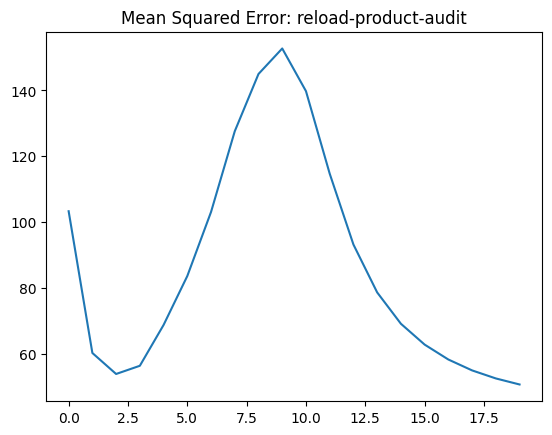

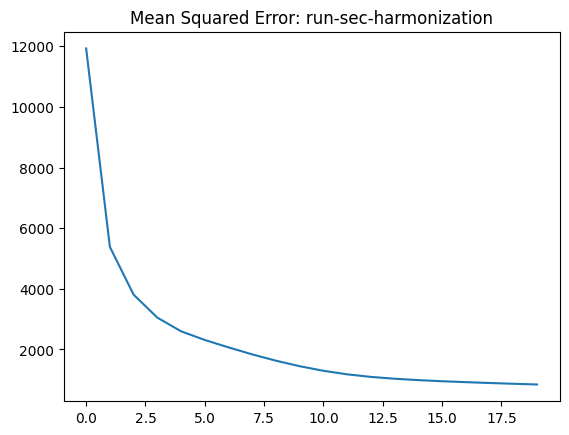

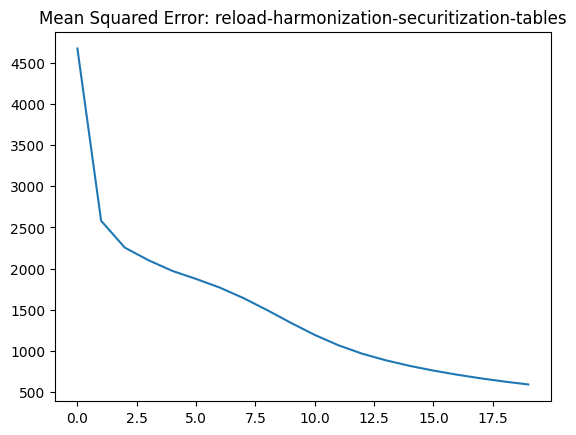

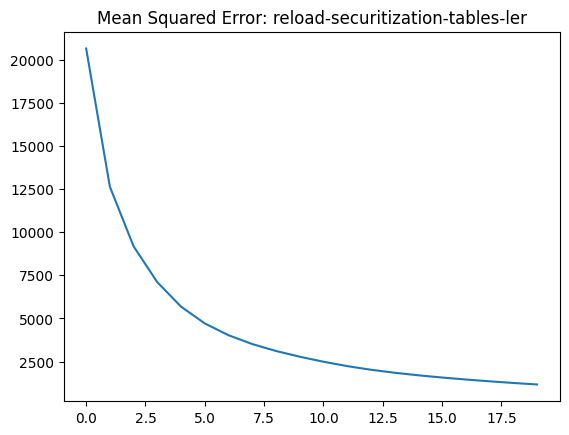

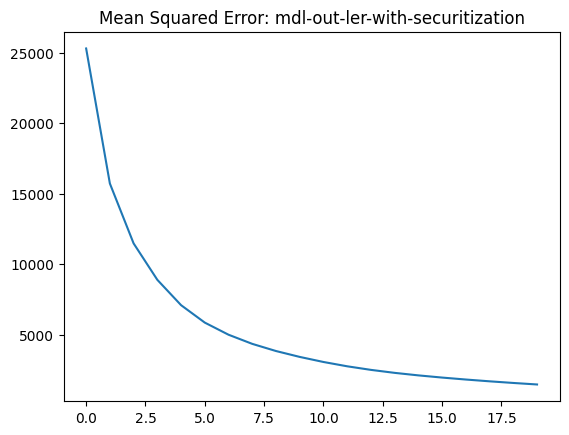

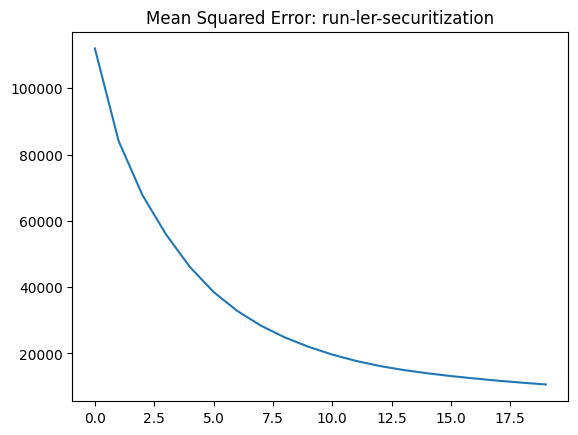

In [230]:
for key in data_stats.keys():
    diff_data_split = np.array_split(data_stats[key], 20)
    diff_mean = np.array([subset.mean() for subset in diff_data_split])
    plt.plot(diff_mean)
    plt.title(f"Mean Squared Error: {key}")
    plt.show()